In [4]:
import pandas as pd
import numpy as np

# Load your CSV data
data = pd.read_csv('West.csv')

# Avoid first column for analysis
X = data.iloc[:, 1:]

data.shape
X.head(4)


,Bus ODESSA 2 0 V pu,Bus ODESSA 2 0 V angle,Bus ODESSA 2 0 Frequency,Bus PRESIDIO 2 0 V pu,Bus PRESIDIO 2 0 V angle,Bus PRESIDIO 2 0 Frequency,Bus O DONNELL 1 0 V pu,Bus O DONNELL 1 0 V angle,Bus O DONNELL 1 0 Frequency,Bus O DONNELL 1 1 V pu,...,Bus MCCAMEY 2 0 Frequency,Bus LAMESA 0 V pu,Bus LAMESA 0 V angle,Bus LAMESA 0 Frequency,Bus GOLDSMITH 0 V pu,Bus GOLDSMITH 0 V angle,Bus GOLDSMITH 0 Frequency,Bus RALLS 2 0 V pu,Bus RALLS 2 0 V angle,Bus RALLS 2 0 Frequency
0,0.9842,-23.0372,60.0000,1.0225,-19.3905,60.0000,1.0131,-17.5830,60.0000,1.0175,...,60.0000,0.9874,-21.7774,60.0000,1.0200,-16.6213,60.0000,1.0318,-31.5607,60.0
1,0.9843,-23.0325,60.0002,1.0225,-19.3836,60.0002,1.0131,-17.5823,60.0000,1.0175,...,60.0000,0.9875,-21.7757,60.0001,1.0201,-16.6137,60.0003,1.0318,-31.5607,60.0
2,0.9843,-23.0284,60.0003,1.0226,-19.3783,60.0003,1.0131,-17.5817,60.0000,1.0175,...,60.0003,0.9875,-21.7746,60.0001,1.0201,-16.6109,60.0003,1.0318,-31.5602,60.0
3,0.9843,-23.0244,60.0003,1.0226,-19.3731,60.0003,1.0131,-17.5802,60.0001,1.0175,...,60.0003,0.9875,-21.7731,60.0001,1.0201,-16.6077,60.0003,1.0318,-31.5600,60.0


In [5]:
# Standardize the data
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)

# # Save the reconstructed column data to a CSV file
output_column_file_path = 'standardised.csv'
X_standardized.to_csv(output_column_file_path, index=False)

X_standardized.head(4)

,Bus ODESSA 2 0 V pu,Bus ODESSA 2 0 V angle,Bus ODESSA 2 0 Frequency,Bus PRESIDIO 2 0 V pu,Bus PRESIDIO 2 0 V angle,Bus PRESIDIO 2 0 Frequency,Bus O DONNELL 1 0 V pu,Bus O DONNELL 1 0 V angle,Bus O DONNELL 1 0 Frequency,Bus O DONNELL 1 1 V pu,...,Bus MCCAMEY 2 0 Frequency,Bus LAMESA 0 V pu,Bus LAMESA 0 V angle,Bus LAMESA 0 Frequency,Bus GOLDSMITH 0 V pu,Bus GOLDSMITH 0 V angle,Bus GOLDSMITH 0 Frequency,Bus RALLS 2 0 V pu,Bus RALLS 2 0 V angle,Bus RALLS 2 0 Frequency
0,-2.040396,-2.181337,0.157837,-3.050846,-2.453660,0.157728,-1.26876,-1.728213,0.157782,-0.995242,...,0.157793,-2.597327,-2.018974,0.157727,-2.915721,-2.373143,0.157795,-1.483331,-1.616904,0.157762
1,-1.877725,-2.161332,0.196544,-3.050846,-2.426772,0.196419,-1.26876,-1.725994,0.157782,-0.995242,...,0.157793,-2.487357,-2.013412,0.177079,-2.751110,-2.342325,0.215847,-1.483331,-1.616904,0.157762
2,-1.877725,-2.143881,0.215898,-2.918055,-2.406119,0.215765,-1.26876,-1.724092,0.157782,-0.995242,...,0.215829,-2.487357,-2.009813,0.177079,-2.751110,-2.330972,0.215847,-1.483331,-1.615469,0.157762
3,-1.877725,-2.126855,0.215898,-2.918055,-2.385855,0.215765,-1.26876,-1.719337,0.177139,-0.995242,...,0.215829,-2.487357,-2.004905,0.177079,-2.751110,-2.317996,0.215847,-1.483331,-1.614895,0.157762


In [6]:
# Compute the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)
cov_matrix.shape

(273, 273)

In [7]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [8]:
# Sort eigenvectors and eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [9]:
# Specify the number of principal components you want to keep
n_components = 140  # Adjust as needed

# Construct principal components
principal_components = eigenvectors[:, :n_components]

In [10]:
# Project the original data onto the principal components
X_pca = np.dot(X_standardized, principal_components)

# Create a DataFrame for the compressed data
compressed_data = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Save the compressed data to a CSV file
output_file_path = 'output2.csv'
compressed_data.to_csv(output_file_path, index=False)

print(f"Compressed data saved to {output_file_path}")

Compressed data saved to output2.csv


In [12]:
# Reconstruct a specific column (e.g., column number 2) from the compressed data
column_to_reconstruct = 4  # Adjust as needed
reconstructed_column = np.dot(X_pca, principal_components.T)[:, column_to_reconstruct - 1]

# Reverse the standardization process to get the original data
reconstructed_original_column = (reconstructed_column * X.std(axis=0)[column_to_reconstruct - 1]) + X.mean(axis=0)[column_to_reconstruct - 1]


# Create a DataFrame for the reconstructed original column
reconstructed_column_data = pd.DataFrame({
    f'Original_Column_{column_to_reconstruct}': reconstructed_original_column,
    'S_Reconstructed_Column': reconstructed_column
}) 

# Save the reconstructed column data to a CSV file
output_column_file_path = 'reconstructed_column.csv'
reconstructed_column_data.to_csv(output_column_file_path, index=False)

print(f"Reconstructed column data saved to {output_column_file_path}")

Reconstructed data saved to reconstructed_data.csv


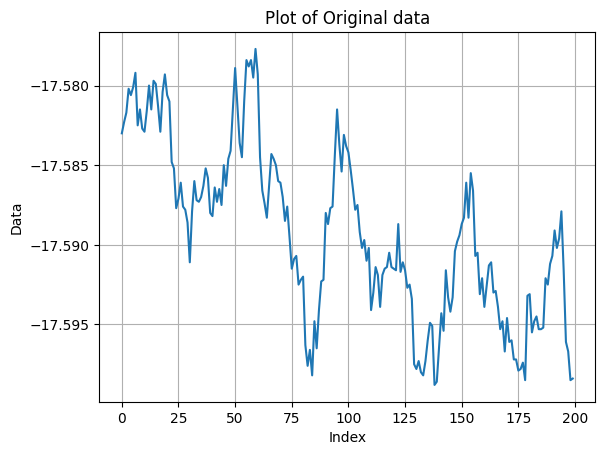

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the reconstructed column data from the CSV file
reconstructed_column_data = pd.read_csv('West.csv')

# Extract the data from the second column
data_from_second_column = reconstructed_column_data.iloc[:, 8]

# Select a limited number of data points
start_index = 0  # Start index of the data points to select
end_index = 200  # End index of the data points to select
limited_data = data_from_second_column[start_index:end_index]

plt.figure()

# Plot the limited data
plt.plot(limited_data)
plt.title('Plot of Original data')
plt.xlabel('Index')
plt.ylabel('Data')
plt.grid(True)
plt.show()


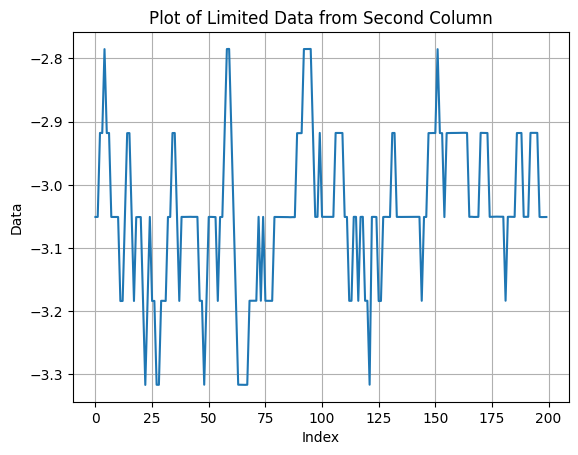

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the reconstructed column data from the CSV file
reconstructed_column_data = pd.read_csv('reconstructed_column.csv')

# Extract the data from the second column
data_from_second_column = reconstructed_column_data.iloc[:, 1]

# Select a limited number of data points
start_index = 0  # Start index of the data points to select
end_index = 200  # End index of the data points to select
limited_data = data_from_second_column[start_index:end_index]

# Plot the limited data
plt.plot(limited_data)
plt.title('Plot of Reconstructed Data')
plt.xlabel('Index')
plt.ylabel('Data')
plt.grid(True)
plt.show()


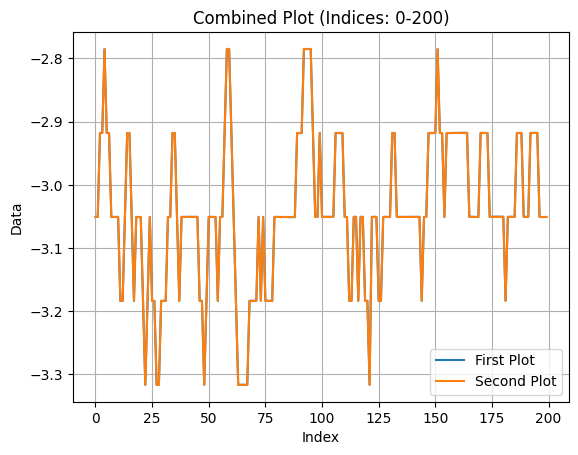

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data from CSV file and select data points within a specific range
def load_and_select_data(file_path, column_index, start_index, end_index):
    reconstructed_column_data = pd.read_csv(file_path)
    data_from_column = reconstructed_column_data.iloc[:, column_index]
    return data_from_column[start_index:end_index]

# Define file paths
file_path_1 = 'reconstructed_column.csv'
file_path_2 = 'standardised.csv'

# Define the range of indices for the data points to be included in the plot
start_index = 0
end_index = 200                         

# Load and select data for the first plot
data_from_second_column_1 = load_and_select_data(file_path_1, 1, start_index, end_index)

# Load and select data for the second plot
data_from_second_column_2 = load_and_select_data(file_path_2, 3, start_index, end_index)

# Plot both sets of data on the same plot
plt.plot(data_from_second_column_1, label='Reconstructed Plot')
plt.plot(data_from_second_column_2, label='Original Plot')
plt.title(f'Combined Plot (Indices: {start_index}-{end_index})')
plt.xlabel('Index')
plt.ylabel('Data')
plt.grid(True)
plt.legend()  # Add legend to distinguish between the two plots
plt.show()
    

In [19]:
import pandas as pd

# Original CSV file name
original_csv_file = "standardised.csv"

# Compressed CSV file name
compressed_csv_file = "output2.csv"

# Load the original CSV file into a DataFrame and count the number of columns
original_data = pd.read_csv(original_csv_file)
num_columns_original = len(original_data.columns)

# Load the compressed CSV file into a DataFrame and count the number of columns
compressed_data = pd.read_csv(compressed_csv_file)
num_columns_compressed = len(compressed_data.columns)

print(f"Number of columns in the original CSV file '{original_csv_file}': {num_columns_original}")
print(f"Number of columns in the compressed CSV file '{compressed_csv_file}': {num_columns_compressed}")


Number of columns in the original CSV file 'standardised.csv': 273
Number of columns in the compressed CSV file 'output2.csv': 140
